In [1]:
from matplotlib import pyplot
from singularite import isJStrict, group
from itertools import product
from functools import cache

In [2]:
@interact
def show2d(n = slider(7, 100)):
    g = group(n)
    pts = [(a, b) for a in g for b in g if n > a + b]
    pyplot.plot([x for (x, _) in pts], [y for (_, y) in pts], 'rx')
    pts = [(a, b) for a in g for b in g if n > a * b]
    pyplot.plot([x for (x, _) in pts], [y for (_, y) in pts], 'b+')
    pyplot.xticks(g, g); pyplot.yticks(g, g); pyplot.show()

Interactive function <function show2d at 0x1649868e0> with 1 widget
  n: TransformIntSlider(value=7, description='n', min=7)

In [3]:
from math import gcd

@interact
def show2(n = slider(2, 30)):
    g = group(n)
    pts = [(a, b) for a in range(1, n) for b in range(1, n) if [(p, q) for p in range(n) for q in range(n) if gcd(a + p*n, b + q*n) == 1]]
    pyplot.plot([x for (x, _) in pts], [y for (_, y) in pts], 'rx')
    # pts = [(a, b) for a in g for b in g if gcd(a, b) == 1]
    pts = [(a, b) for a in range(1, n) for b in range(1, n) if a in g or b in g ]
    pyplot.plot([x for (x, _) in pts], [y for (_, y) in pts], 'b*')
    pyplot.xticks(g, g); pyplot.yticks(g, g); pyplot.show()

Interactive function <function show2 at 0x110948ea0> with 1 widget
  n: TransformIntSlider(value=2, description='n', max=30, min=2)

In [4]:
@interact
def view_gcd(n = slider(2, 30)):
    g = group(n)
    return list_plot3d([(a, b, gcd(a, b)) for a in g for b in g if a <= b])

    

Interactive function <function view_gcd at 0x16e327920> with 1 widget
  n: TransformIntSlider(value=2, description='n', max=30, min=2)

In [5]:
@interact
def f(n = slider(2, 100)):
    g = group(n)
    pts = [(a, b) for a in g for b in g if isJStrict(n, (a, b))]
    pyplot.plot([x for (x, _) in pts], [y for (_, y) in pts], 'r*')
    pyplot.xticks(g, g)
    pyplot.yticks(g, g)
    pyplot.show()

Interactive function <function f at 0x16e394860> with 1 widget
  n: TransformIntSlider(value=2, description='n', min=2)

In [6]:
@interact
def vis3d(n = slider(2, 100)):
    pts = [p for p in product(group(n), repeat=3) if isJStrict(n, p)]
    return sum ( point(p, size=100) for p in pts )

Interactive function <function vis3d at 0x16e4b3920> with 1 widget
  n: TransformIntSlider(value=2, description='n', min=2)

In [7]:
@interact
def prop1(n = slider(2, 100)):
    return sum( point( (a, b) ) for (a, b) in product(range(1, n), repeat=2) if a + b == n)

Interactive function <function prop1 at 0x16e4b3b00> with 1 widget
  n: TransformIntSlider(value=2, description='n', min=2)

In [8]:
@interact
def vis2in3d(N = slider(3, 40)):
    return sum( point( (a, b, n), size=100 )
               for n in range(1, N)
               for (a, b) in product(group(n), repeat=2) 
               if isJStrict(n, (a, b)))
    

Interactive function <function vis2in3d at 0x16e3f2020> with 1 widget
  N: TransformIntSlider(value=3, description='N', max=40, min=3)

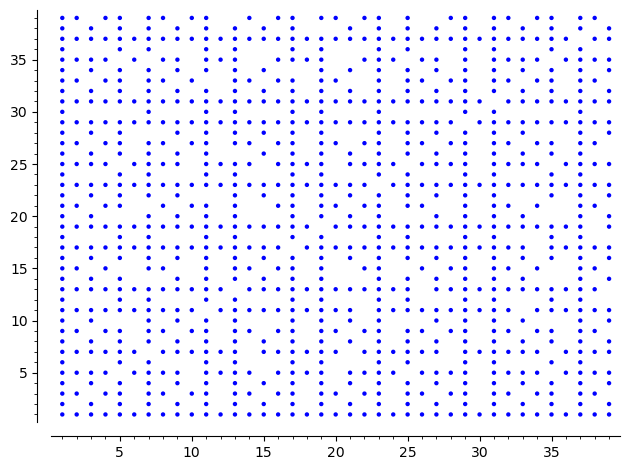

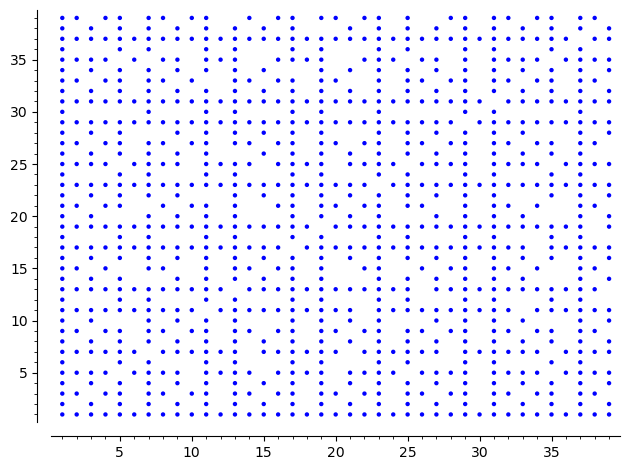

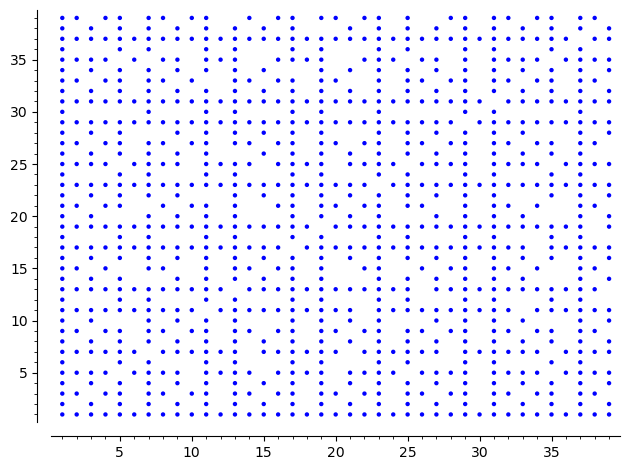

In [2]:
def vismod(a, n):
    while a != 1:
        if gcd(a, n) != 1:
            return False
        a, n = (-n) % a, a
    return True

n = 40
# for (a, n) in product(range(1, n), repeat=2):
#     assert vismod(a, n) == (gcd(a, n) == 1)
show(sum( point((a, n)) for (a, n) in product(range(1, n), repeat=2) if isJStrict(n, (a,))))
show(sum( point((a, n)) for (a, n) in product(range(1, n), repeat=2) if vismod(a,n)))
show(sum( point((a, n)) for (a, n) in product(range(1, n), repeat=2) if gcd(a, n) == 1))
